# Overview

1. Ingestion
2. Data Exploration
3. Model

# 1. Ingestion

In [1]:
!pip install tabulate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import os

In [2]:
TRAIN_FILE = "/kaggle/working/train.csv"
TEST_FILE = "/kaggle/working/test.csv"

if not os.path.exists(TRAIN_FILE):
    print(f"Unzipping {TRAIN_FILE}...")
    !unzip /kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip

if not os.path.exists(TEST_FILE):
    print(f"Unzipping {TEST_FILE}...")
    !unzip /kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip

Unzipping /kaggle/working/train.csv...
Archive:  /kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip
  inflating: train.csv               
Unzipping /kaggle/working/test.csv...
Archive:  /kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip
  inflating: test.csv                


In [3]:
df = pd.read_csv(TRAIN_FILE)

# 2. Data Exploration

In [4]:
df.head(10)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,7,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,8,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,12,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,19,0.280942,0.701457,0.179633,0.141183,white,Ghost


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


🔑 **Insights**
* Our dataset is quite small with only $371$ records.
* It has mixed features excluding the `id`: $4$ continuous (numerical) and $2$ categorical values
* There are **NO** missing values in any of the columns in the dataset.

# 2.2 Feature Univariate Analysis

Let's take a peek on each feature.

# 2.2.1 Bone Length

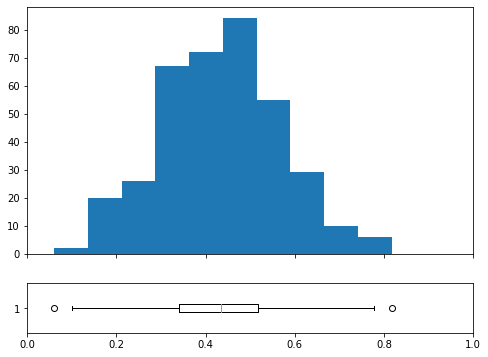

count    371.000000
mean       0.434160
std        0.132833
min        0.061032
25%        0.340006
50%        0.434891
75%        0.517223
max        0.817001
Name: bone_length, dtype: float64


In [6]:
def analyze_num_var(series):
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, figsize=(8,6),
                                        gridspec_kw={"height_ratios": (.75, .15)})
    ax_hist.hist(series)
    ax_box.boxplot(series, vert=False)
    ax_hist.set_xlim(0,1)
    plt.show()
    
    print(series.describe())

analyze_num_var(df['bone_length'])

# 2.2.2 Rotting Flesh

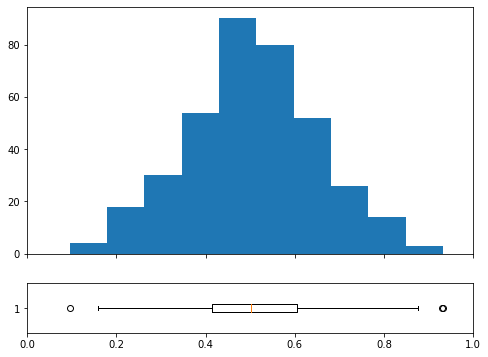

count    371.000000
mean       0.506848
std        0.146358
min        0.095687
25%        0.414812
50%        0.501552
75%        0.603977
max        0.932466
Name: rotting_flesh, dtype: float64


In [7]:
analyze_num_var(df['rotting_flesh'])

# 2.2.3 Hair Length

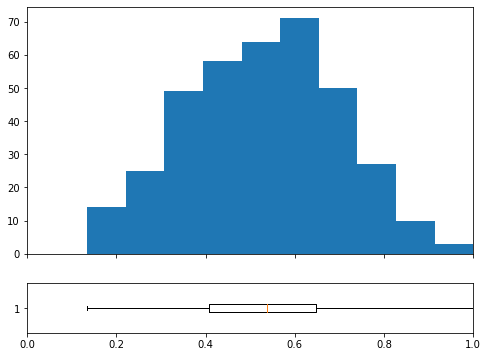

count    371.000000
mean       0.529114
std        0.169902
min        0.134600
25%        0.407428
50%        0.538642
75%        0.647244
max        1.000000
Name: hair_length, dtype: float64


In [8]:
analyze_num_var(df['hair_length'])

# 2.2.4 Soul Percentage

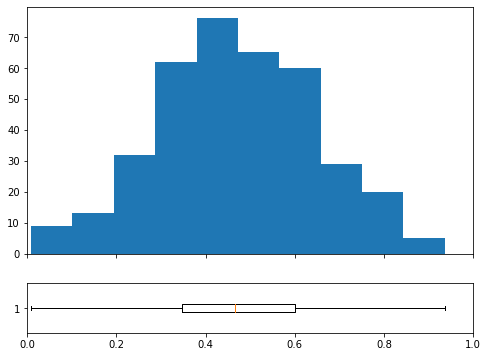

count    371.000000
mean       0.471392
std        0.176129
min        0.009402
25%        0.348002
50%        0.466372
75%        0.600610
max        0.935721
Name: has_soul, dtype: float64


In [9]:
analyze_num_var(df['has_soul'])

# 2.2.5 Color

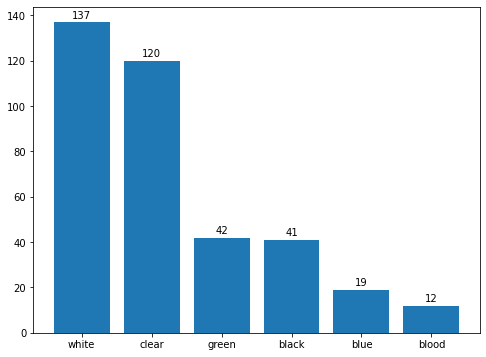

In [10]:
def analyze_cat_var(series):
    value_counts = series.value_counts()
    
    plt.figure(figsize=(8, 6))
    rect = plt.bar(value_counts.index, value_counts.values)
    plt.bar_label(rect, value_counts.values, padding=2)
    
analyze_cat_var(df['color'])

# 2.2.6 Type (Target Class)

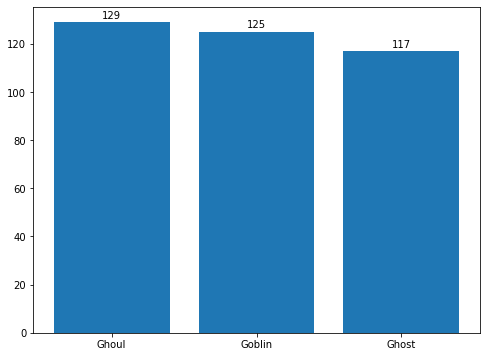

In [11]:
analyze_cat_var(df['type'])

🔑 **Insights**
* The target class records are balanced.

# 2.3 Feature Bivariate Analysis

Let's peek on the features compared agains the target class, **Type**.

# 2.3.1 Bone Length against Type

╒════════════════╤═══════════╤══════════╤══════════╕
│ Monster Type   │     Ghost │   Goblin │    Ghoul │
╞════════════════╪═══════════╪══════════╪══════════╡
│ mean           │ 0.347466  │ 0.42965  │ 0.517159 │
├────────────────┼───────────┼──────────┼──────────┤
│ std            │ 0.117748  │ 0.101917 │ 0.1206   │
├────────────────┼───────────┼──────────┼──────────┤
│ min            │ 0.0610318 │ 0.208625 │ 0.200753 │
├────────────────┼───────────┼──────────┼──────────┤
│ 50%            │ 0.340442  │ 0.430797 │ 0.515397 │
├────────────────┼───────────┼──────────┼──────────┤
│ max            │ 0.622371  │ 0.678519 │ 0.817001 │
╘════════════════╧═══════════╧══════════╧══════════╛


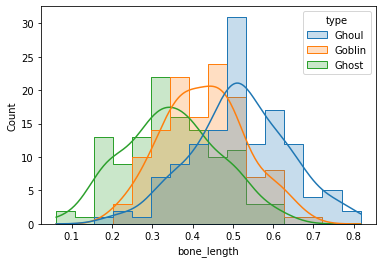

In [12]:
def bivariate_num_var_against_type(column):
    def tabulate_col_stats(column):
        monster_types = ['Ghost', 'Goblin', 'Ghoul']
        stats_per_monster = {monster: df[df['type'] == monster][column].describe() for monster in monster_types}

        table_data =[ ["Monster Type"] + monster_types]
        for stat in ['mean', 'std', 'min', '50%', 'max']:
            row = [stat]
            for monster_type in monster_types:
                row.append(stats_per_monster[monster_type][stat])
            table_data.append(row)

        print(tabulate(table_data, headers='firstrow', tablefmt='fancy_grid'))
        [stats_per_monster[m]['mean'] for m in monster_types]

    sns.histplot(df, x='bone_length', hue='type', element="step", kde=True, common_norm=False)
    tabulate_col_stats(column)

bivariate_num_var_against_type('bone_length')

# 2.3.2 Rotting Flesh against Type

╒════════════════╤══════════╤═══════════╤══════════╕
│ Monster Type   │    Ghost │    Goblin │    Ghoul │
╞════════════════╪══════════╪═══════════╪══════════╡
│ mean           │ 0.593759 │ 0.442357  │ 0.490515 │
├────────────────┼──────────┼───────────┼──────────┤
│ std            │ 0.14215  │ 0.140284  │ 0.115357 │
├────────────────┼──────────┼───────────┼──────────┤
│ min            │ 0.165539 │ 0.0956866 │ 0.172182 │
├────────────────┼──────────┼───────────┼──────────┤
│ 50%            │ 0.60378  │ 0.45749   │ 0.491497 │
├────────────────┼──────────┼───────────┼──────────┤
│ max            │ 0.932466 │ 0.840049  │ 0.779153 │
╘════════════════╧══════════╧═══════════╧══════════╛


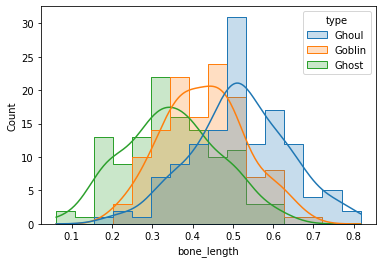

In [13]:
bivariate_num_var_against_type('rotting_flesh')

# 2.3.3 Hair Length against Type

╒════════════════╤══════════╤══════════╤══════════╕
│ Monster Type   │    Ghost │   Goblin │    Ghoul │
╞════════════════╪══════════╪══════════╪══════════╡
│ mean           │ 0.373186 │ 0.544581 │ 0.65555  │
├────────────────┼──────────┼──────────┼──────────┤
│ std            │ 0.117642 │ 0.116964 │ 0.138127 │
├────────────────┼──────────┼──────────┼──────────┤
│ min            │ 0.1346   │ 0.239212 │ 0.287008 │
├────────────────┼──────────┼──────────┼──────────┤
│ 50%            │ 0.365142 │ 0.558776 │ 0.667384 │
├────────────────┼──────────┼──────────┼──────────┤
│ max            │ 0.63634  │ 0.840013 │ 1        │
╘════════════════╧══════════╧══════════╧══════════╛


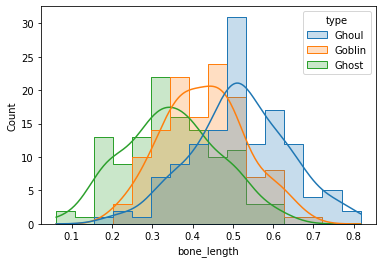

In [14]:
bivariate_num_var_against_type('hair_length')

# 2.3.4 Soul Percentage against Type

╒════════════════╤════════════╤══════════╤══════════╕
│ Monster Type   │      Ghost │   Goblin │    Ghoul │
╞════════════════╪════════════╪══════════╪══════════╡
│ mean           │ 0.320023   │ 0.478663 │ 0.601634 │
├────────────────┼────────────┼──────────┼──────────┤
│ std            │ 0.13979    │ 0.127293 │ 0.134813 │
├────────────────┼────────────┼──────────┼──────────┤
│ min            │ 0.00940162 │ 0.194413 │ 0.280854 │
├────────────────┼────────────┼──────────┼──────────┤
│ 50%            │ 0.307534   │ 0.466024 │ 0.600393 │
├────────────────┼────────────┼──────────┼──────────┤
│ max            │ 0.68998    │ 0.854949 │ 0.935721 │
╘════════════════╧════════════╧══════════╧══════════╛


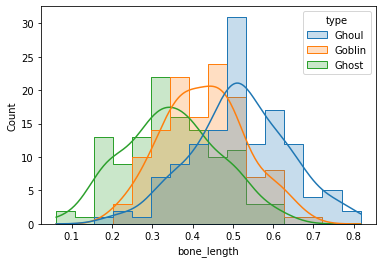

In [15]:
bivariate_num_var_against_type('has_soul')

# 2.3.5 Color against Type

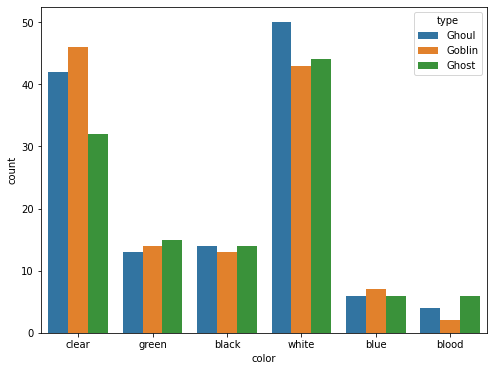

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='color', hue='type')
plt.show()